<center><h1>Future Contract Rolling</h1>
Zach Brown<br>
MSDS 7333 - Quantifying the World<br>
June 7, 2017</center>

## Abstract

<b>In future contract rolling, it is imperative to determine the optimal time to trade out of an expiring near contract to the far contract in order to be a successful trader.  This study examined a method using seighted sums of random walk simulations for two different future contracts for Tesla stock.  The returns generated using this method were inconclusive with a mean of 0.  There are lots of opportunities for further studying this subject though, as this case study only examined one future rolling method, one data projection method and one stock.</b>

## Introduction

Financial markets provide a myriad of different ways to invest one's money.  Futures contracts are one of these such options.  Investopedia defines a futures contract as "[A] legal agreement, generally made on the trading floor of a futures exchange, to buy or sell a particular commodity or financial instrument at a predetermined price at a specified time in the future" (Investopedia Staff, 2003).  So a buyer will agree to buy a futures contract, hoping that the market price at the time of purchase is higher than the price agreed to in the contract.  Conversely, the seller is betting that the market price will be lower than the price agreed to in the contract.

At any given time, there are generally many existing futures contracts for a given commodity all with different expiration dates.  In addition to simply agreeing to a contract and then completing the payment at the agreed-upon date, one can also trade contracts.  This complictes things further, as one must attempt to calculate the optimal time to trade out of an expiring contract.

The purpose of this case study is to analyze one method of calculating when to trade out an expiring contract for a new contract.  We will simulate future data for Tesla stock, determine the optimal time to trade from one contract to the next and then evaluate the results.  Ideally, this will result in positive returns.

The code used in this case study was based on pages 347 - 350 of "Python for Data Analysis" (McKinney, 2012).

## Methods and Results

The first step in this analysis is to import all required libraries.  We will use the matplotlib, numpy, pandas, and pandas_datareader libraries, as well as the datetime command from the datetime library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline

Next, we use the pandas_datareader library to download daily closing prices from Google Finance.  We will be analyzing Tesla's stock data in this case study

In [2]:
px = web.get_data_google('TSLA')['Close'] * 10

In [3]:
px

Date
2010-06-29     238.9
2010-06-30     238.3
2010-07-01     219.6
2010-07-02     192.0
2010-07-06     161.1
2010-07-07     158.0
2010-07-08     174.6
2010-07-09     174.0
2010-07-12     170.5
2010-07-13     181.4
2010-07-14     198.4
2010-07-15     198.9
2010-07-16     206.4
2010-07-19     219.1
2010-07-20     203.0
2010-07-21     202.2
2010-07-22     210.0
2010-07-23     212.9
2010-07-26     209.5
2010-07-27     205.5
2010-07-28     207.2
2010-07-29     203.5
2010-07-30     199.4
2010-08-02     209.2
2010-08-03     219.5
2010-08-04     212.6
2010-08-05     204.5
2010-08-06     195.9
2010-08-09     196.0
2010-08-10     190.3
               ...  
2017-04-26    3101.7
2017-04-27    3086.3
2017-04-28    3140.7
2017-05-01    3228.3
2017-05-02    3188.9
2017-05-03    3110.2
2017-05-04    2954.6
2017-05-05    3083.5
2017-05-08    3071.9
2017-05-09    3212.6
2017-05-10    3252.2
2017-05-11    3231.0
2017-05-12    3248.1
2017-05-15    3158.8
2017-05-16    3170.1
2017-05-17    3061.1
2017-05-

Next, we create a dictionary containing two future contracts and their expiration dates.

In [4]:
expiry = {'ESU2': datetime(2017, 9, 21),
         'ESZ2': datetime(2017, 12, 21)}

This dictionary is converted to a Pandas Series and sorted.

In [5]:
expiry = Series(expiry).sort_values()

In [6]:
expiry

ESU2   2017-09-21
ESZ2   2017-12-21
dtype: datetime64[ns]

We then simulate future closing prices of the Tesla stock using historical data with a random walk and noise.  We use a seed of 12347 to initialize the random number generator.  This allows the results to be duplicated later if necessary.

In [7]:
np.random.seed(12347)

The variable N is set to 200 and will be used to specify the desired number of simulated data points.

In [8]:
N = 200

The distance for each random walk step (without noise) is calculated by generating an array of 200 random integers between 0 and 20, subtracting 100 and multiplying by 0.25.

In [9]:
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25

Similarly, the noise for each step is calculated by generating 200 random integers between 0 and 20, subtracting 10 and multiplying by 0.25.  These numbers are stored in an array called perturb.

In [10]:
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25

The walk array is then converted from individual steps to a cumulative sum.

In [11]:
walk = walk.cumsum()

A date range is created to encapsulate the dates from the historical data as well as the additional 200 simulated dates.  The frequency for this date range is business days, as the stock market is not open on weekends.

In [12]:
rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')

We then create a time series for the near contract and for the far contract.  The near contract time series is created by adding the cumulative walk numbers to the last element in the px time series (which contains the historical data).  The far time series is constructed similarly, but the perturb data is also added in this case.  This results in the two time series differing from each other by the random noise generated in the perturb time series.

In [13]:
near = np.concatenate([px.values, px.values[-1] + walk])

In [14]:
far = np.concatenate([px.values, px.values[-1] + walk + perturb])

The prices dataframe is constructed using the near and far time series with the date range we created earlier serving as the index.

In [15]:
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

The plot below shows that the simulated prices for both contracts appear to rise fairly rapidly before leveling off.

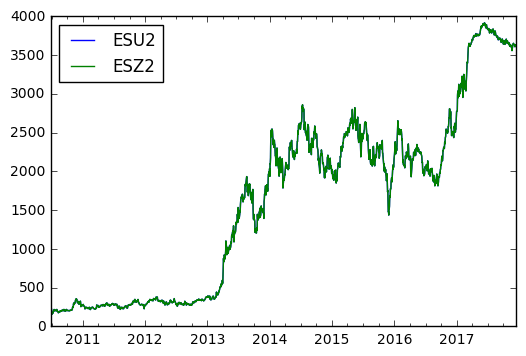

In [16]:
prices.plot()

In [17]:
prices.tail()

,ESU2,ESZ2
2017-12-08,3625.75,3627.50
2017-12-11,3612.00,3614.25
2017-12-12,3620.00,3621.75
2017-12-13,3636.50,3635.75
2017-12-14,3616.50,3614.25


In order to splice the time series for the two contracts into one time series, we need to determine when to roll to the next contract.  We will do this by creating a weighting matrix using linear decay.  The get_roll_weights function will assign a weight of 1 to the active contract until the expiration date draws near.

In [18]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date
    return weights

We construct the weights matrix by passing the end date of the historical data, the expiration dates for the future contracts and the names of the contracts to the get_roll_weights function that was just created above.

In [19]:
weights = get_roll_weights('6/7/2017', expiry, prices.columns)

Looking at the weights leading up to the expiry of the ESU2 contract, we can see that they begin to transition from the near contract to the far contract a week before the contract expires on 9/21/2017.  The weights for ESU2 slowly drop from 1 to 0 an the weights for ESZ2 increase from 0 to 1 at the inverse rate.

In [20]:
weights.ix['2017-09-12':'2017-09-21']

,ESU2,ESZ2
2017-09-12,1.0,0.0
2017-09-13,1.0,0.0
2017-09-14,0.8,0.2
2017-09-15,0.6,0.4
2017-09-18,0.4,0.6
2017-09-19,0.2,0.8
2017-09-20,0.0,1.0
2017-09-21,0.0,1.0


Lastly, we can now calculate the rolled future returns.  This is done by simply multiplying the individual contract returns by their weights and summing the results.  The fact that the weights of the two contracts always sum to 1 allows us to do this.

In [21]:
rolled_returns = (prices.pct_change() * weights).sum(1)

When taking the mean of the rolled returns, we get a number very close to 0.

In [22]:
rolled_returns['2017-06-07':].mean()

-0.0005186290258354034

The plot below reveals how random the rolled returns are on a day to day basis.  There also does not appear to be either an upward or downward trend.  Given that each individual step was calculated using a random number and the mean of the result set is effectively zero, the fact that the plotted data appears to fluctuate randomly around 0 is not surprising.

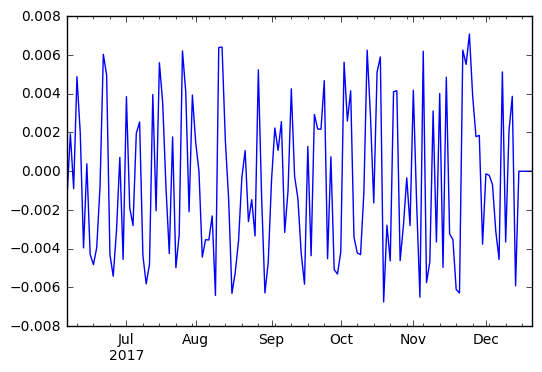

In [23]:
rolled_returns['2017-06-07':].plot()

## Conclusions and Future Work

The purpose of this case study was to evaluate one method of determining the opportune time to roll from one futures contract to the next.  If successful, we would expect the returns using this method to be positive.  The actual results were neutral, with an approximately zero mean for the returns.  This would lead to the conclusion that the future contract rolling method examined in this study was not effective for Tesla stock.

There is a lot of room for future work related to this case study.  There may be other data simulation methods that are more accurate than the random walk algorithm used in this study.  There may also be different methods of weighting the future contracts that could be analyzed other than the linear decay method utilized in this study.  This study also only examined one stock.  Future studies could examine more and different stocks to determine if the results produced were simply a function of Tesla's historical closing prices.

## References

Investopedia Staff. (2003, November 23). Futures Contract. Retrieved June 07, 2017, from http://www.investopedia.com/terms/f/futurescontract.sp

McKinney, W. (2012). Python for Data Analysis (First ed.). OReilly.